are we treating for the viral load? (yes or no) no
are we treating for the tumour? (yes or no) no


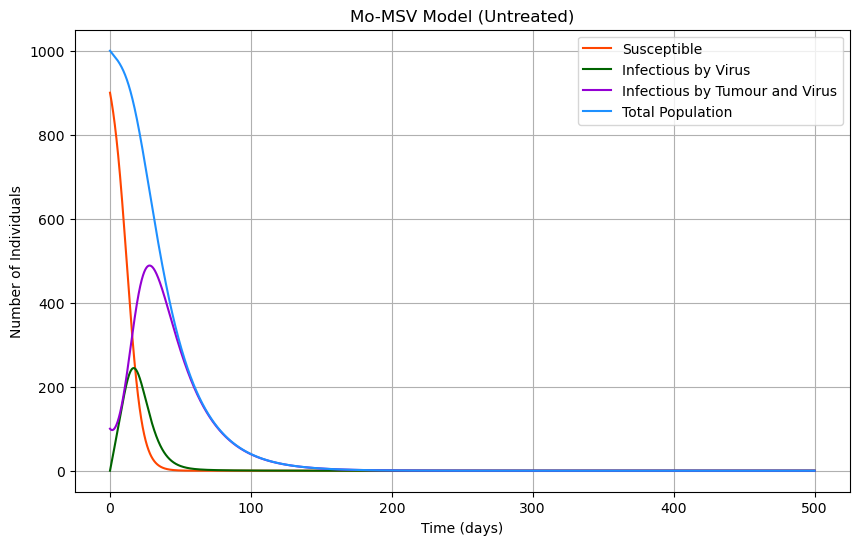

In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

AZT = input("are we treating for the viral load? (yes or no) ").lower()
#phi = proportion of hamsters treated for viral load
if AZT == 'yes':
    phi = 1 
    virus = "no"
elif AZT == 'no':
    phi = 0
    virus = "yes"
else:
    print ("please restart the cell and answer yes or no")
    
metformin_diclofenac = input("are we treating for the tumour? (yes or no) ").lower()
#epsilon = proportion of hamsters treated for tumour
if metformin_diclofenac == 'yes':
    epsilon = 1
    tumour = "no"
elif metformin_diclofenac == 'no':
    epsilon = 0
    tumour = "yes"
else:
    print ("please restart the cell and answer yes or no")
    
# SID model parameters
theta = 0.00136986 #natural death rate (can be assumption) 
mu = 0.00136986 #birth rate  (from handbook - 6 pups in litter w/ gestation period of 16 days, assuming once per month)
delta = 1/23.67  # Disease-induced death rate (got this from group doc)
beta = 0.2 #transmission rate (made up) (rate mating + estimate interaction rate)
omega = 0.15 #difference in rates after treatment for viral load
alpha = 1/6.33 #rate of tumour progression to get to 1cm (considered large enough to be spread)
kappa = 2.5/19 #rate of tumour shrinking


# Parameters
P = 1000  # initial population (usually you want the population to be fairly big)
E0 = 0 #inital number of exposed individuals
It0 = 100 * phi # initial number of individuals infectious by tumour alone
Iv0 = 0 # initial number of individuals infectious by virus alone
Ivt0 = 100 * (1-phi) # initial number of infectious by virus and tumour 
S0 = P - Iv0 - It0 - Ivt0 - E0 # initial number of susceptible individuals
D0 = 0 # initial number of deaths
#Note: at any time we should have N=S+I+E
K = 1000 #carrying capacity

    
def sid_model(y, t, P, beta, delta, mu, theta, alpha, kappa, phi, K, omega, epsilon):
    N, S, E, It, Iv, Ivt, D = y
    dNdt = mu * N - (theta * N * N/K) - (delta * (It + Ivt))
    dSdt = (mu * (S)) - ((beta - (phi*omega)) * S * (It + Iv + Ivt) / N) - (theta * S * N/K) + (kappa * epsilon * It)
    dEdt = (mu * (E + It)) + ((beta - (phi*omega)) * S * (It + Iv + Ivt) / N * phi) - (alpha * E) - (theta * E * N/K)
    dItdt = (alpha * E) - (epsilon * kappa * It) - (delta * It) - (theta * It * N/K)
    dIvdt = ((beta - (phi*omega)) * S * (It + Iv + Ivt) / N * (1-phi)) + (mu * (Iv + Ivt)) + (epsilon * kappa * Ivt) - (alpha * Iv) - (theta * Iv * N/K)
    dIvtdt = (alpha * Iv) - (epsilon * kappa * Ivt) - (delta * Ivt) - (theta * Ivt * N/K)
    dDdt = (theta * (S + E + It + Iv + Ivt) * N/K) + (delta * (It + Ivt))
    return [dNdt, dSdt, dEdt, dItdt, dIvdt, dIvtdt, dDdt]

t = np.linspace(0, 500, 100000)

# Initial conditions
y0_sid = P, S0, E0, It0, Iv0, Ivt0, D0 # Including the initial number of deaths in the initial conditions

# Integrate the SID equations over time t
ret_sid = odeint(sid_model, y0_sid, t, args=(P, beta, delta, mu, theta, alpha, kappa, phi, K, omega, epsilon))
N_sid, S_sid, E_sid, It_sid, Iv_sid, Ivt_sid, D_sid = ret_sid.T #Transpose the vector

# Plotting the SVEID model results
plt.figure(figsize=(10, 6))
plt.rcParams['font.size'] = 10
#plt.plot(t, N, 'g', label='Total Population')
plt.plot(t, S_sid, 'orangered', label='Susceptible')
if virus == "no":
    plt.plot(t, E_sid, 'lime', label='Exposed')
    plt.plot(t, It_sid, 'deeppink', label = 'Infectious by Tumour')
elif virus == "yes":
    plt.plot(t, Iv_sid, 'darkgreen', label = 'Infectious by Virus')
    plt.plot(t, Ivt_sid, 'darkviolet', label = 'Infectious by Tumour and Virus')
plt.plot(t, (N_sid), 'dodgerblue', label='Total Population')
#plt.plot(t/365, D_sid, 'k', label='Deceased') #- can uncomment this if you would like to see death!
if virus == "yes" and tumour == "yes":
    plt.title('Mo-MSV Model (Untreated)')
elif virus == "no" and tumour == "yes":
    plt.title('Mo-MSV Model (Treated by AZT)')
elif virus == "yes" and tumour == "no":
    plt.title('Mo-MSV Model (Treated by Metformin/Diclofenac)')
else:
    plt.title('Mo-MSV Model (Treated by Metformin/Diclofenac and AZT)')
plt.xlabel('Time (days)')
plt.ylabel('Number of Individuals')
plt.legend()
plt.grid(True)
plt.show()

are we treating for the viral load? (yes or no) yes
are we treating for the tumour? (yes or no) yes


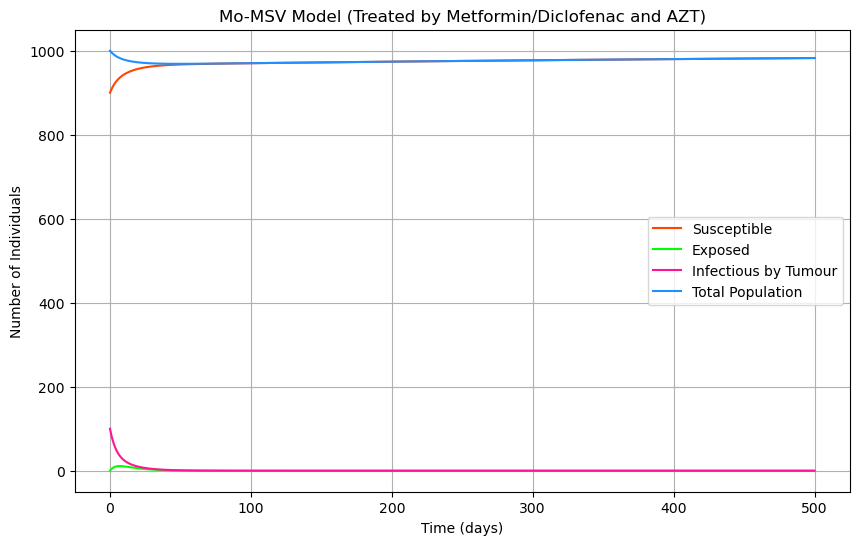

In [8]:
AZT = input("are we treating for the viral load? (yes or no) ").lower()
#phi = proportion of hamsters treated for viral load
if AZT == 'yes':
    phi = 1 
    virus = "no"
elif AZT == 'no':
    phi = 0
    virus = "yes"
else:
    print ("please restart the cell and answer yes or no")
    
metformin_diclofenac = input("are we treating for the tumour? (yes or no) ").lower()
#epsilon = proportion of hamsters treated for tumour
if metformin_diclofenac == 'yes':
    epsilon = 1
    tumour = "no"
elif metformin_diclofenac == 'no':
    epsilon = 0
    tumour = "yes"
else:
    print ("please restart the cell and answer yes or no")

# reset parameters
P = 1000  # initial population (usually you want the population to be fairly big)
E0 = 0 #inital number of exposed individuals
It0 = 100 * phi # initial number of individuals infectious by tumour alone
Iv0 = 0 # initial number of individuals infectious by virus alone
Ivt0 = 100 * (1-phi) # initial number of infectious by virus and tumour 
S0 = P - Iv0 - It0 - Ivt0 - E0 # initial number of susceptible individuals
D0 = 0 # initial number of deaths
#Note: at any time we should have N=S+I+E
K = 1000 #carrying capacity

t = np.linspace(0, 500, 100000)

# Initial conditions
y0_sid = P, S0, E0, It0, Iv0, Ivt0, D0 # Including the initial number of deaths in the initial conditions

# Integrate the SID equations over time t
ret_sid = odeint(sid_model, y0_sid, t, args=(P, beta, delta, mu, theta, alpha, kappa, phi, K, omega, epsilon))
N_sid, S_sid, E_sid, It_sid, Iv_sid, Ivt_sid, D_sid = ret_sid.T #Transpose the vector

# Plotting the SVEID model results
plt.figure(figsize=(10, 6))
plt.rcParams['font.size'] = 10
#plt.plot(t, N, 'g', label='Total Population')
plt.plot(t, S_sid, 'orangered', label='Susceptible')
if virus == "no":
    plt.plot(t, E_sid, 'lime', label='Exposed')
    plt.plot(t, It_sid, 'deeppink', label = 'Infectious by Tumour')
elif virus == "yes":
    plt.plot(t, Iv_sid, 'darkgreen', label = 'Infectious by Virus')
    plt.plot(t, Ivt_sid, 'darkviolet', label = 'Infectious by Tumour and Virus')
plt.plot(t, (N_sid), 'dodgerblue', label='Total Population')
#plt.plot(t/365, D_sid, 'k', label='Deceased') #- can uncomment this if you would like to see death!
if virus == "yes" and tumour == "yes":
    plt.title('Mo-MSV Model (Untreated)')
elif virus == "no" and tumour == "yes":
    plt.title('Mo-MSV Model (Treated by AZT)')
elif virus == "yes" and tumour == "no":
    plt.title('Mo-MSV Model (Treated by Metformin/Diclofenac)')
else:
    plt.title('Mo-MSV Model (Treated by Metformin/Diclofenac and AZT)')
plt.xlabel('Time (days)')
plt.ylabel('Number of Individuals')
plt.legend()
plt.grid(True)
plt.show()

are we treating for the viral load? (yes or no) yes
are we treating for the tumour? (yes or no) no


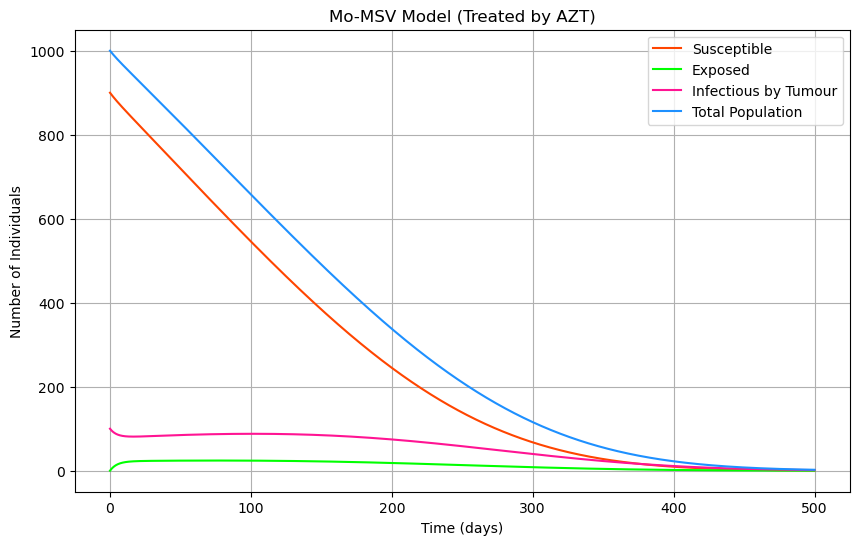

In [9]:
AZT = input("are we treating for the viral load? (yes or no) ").lower()
#phi = proportion of hamsters treated for viral load
if AZT == 'yes':
    phi = 1 
    virus = "no"
elif AZT == 'no':
    phi = 0
    virus = "yes"
else:
    print ("please restart the cell and answer yes or no")
    
metformin_diclofenac = input("are we treating for the tumour? (yes or no) ").lower()
#epsilon = proportion of hamsters treated for tumour
if metformin_diclofenac == 'yes':
    epsilon = 1
    tumour = "no"
elif metformin_diclofenac == 'no':
    epsilon = 0
    tumour = "yes"
else:
    print ("please restart the cell and answer yes or no")

# reset parameters
P = 1000  # initial population (usually you want the population to be fairly big)
E0 = 0 #inital number of exposed individuals
It0 = 100 * phi # initial number of individuals infectious by tumour alone
Iv0 = 0 # initial number of individuals infectious by virus alone
Ivt0 = 100 * (1-phi) # initial number of infectious by virus and tumour 
S0 = P - Iv0 - It0 - Ivt0 - E0 # initial number of susceptible individuals
D0 = 0 # initial number of deaths
#Note: at any time we should have N=S+I+E
K = 1000 #carrying capacity

t = np.linspace(0, 500, 100000)

# Initial conditions
y0_sid = P, S0, E0, It0, Iv0, Ivt0, D0 # Including the initial number of deaths in the initial conditions

# Integrate the SID equations over time t
ret_sid = odeint(sid_model, y0_sid, t, args=(P, beta, delta, mu, theta, alpha, kappa, phi, K, omega, epsilon))
N_sid, S_sid, E_sid, It_sid, Iv_sid, Ivt_sid, D_sid = ret_sid.T #Transpose the vector

# Plotting the SVEID model results
plt.figure(figsize=(10, 6))
plt.rcParams['font.size'] = 10
#plt.plot(t, N, 'g', label='Total Population')
plt.plot(t, S_sid, 'orangered', label='Susceptible')
if virus == "no":
    plt.plot(t, E_sid, 'lime', label='Exposed')
    plt.plot(t, It_sid, 'deeppink', label = 'Infectious by Tumour')
elif virus == "yes":
    plt.plot(t, Iv_sid, 'darkgreen', label = 'Infectious by Virus')
    plt.plot(t, Ivt_sid, 'darkviolet', label = 'Infectious by Tumour and Virus')
plt.plot(t, (N_sid), 'dodgerblue', label='Total Population')
#plt.plot(t/365, D_sid, 'k', label='Deceased') #- can uncomment this if you would like to see death!
if virus == "yes" and tumour == "yes":
    plt.title('Mo-MSV Model (Untreated)')
elif virus == "no" and tumour == "yes":
    plt.title('Mo-MSV Model (Treated by AZT)')
elif virus == "yes" and tumour == "no":
    plt.title('Mo-MSV Model (Treated by Metformin/Diclofenac)')
else:
    plt.title('Mo-MSV Model (Treated by Metformin/Diclofenac and AZT)')
plt.xlabel('Time (days)')
plt.ylabel('Number of Individuals')
plt.legend()
plt.grid(True)
plt.show()

are we treating for the viral load? (yes or no) no
are we treating for the tumour? (yes or no) yes


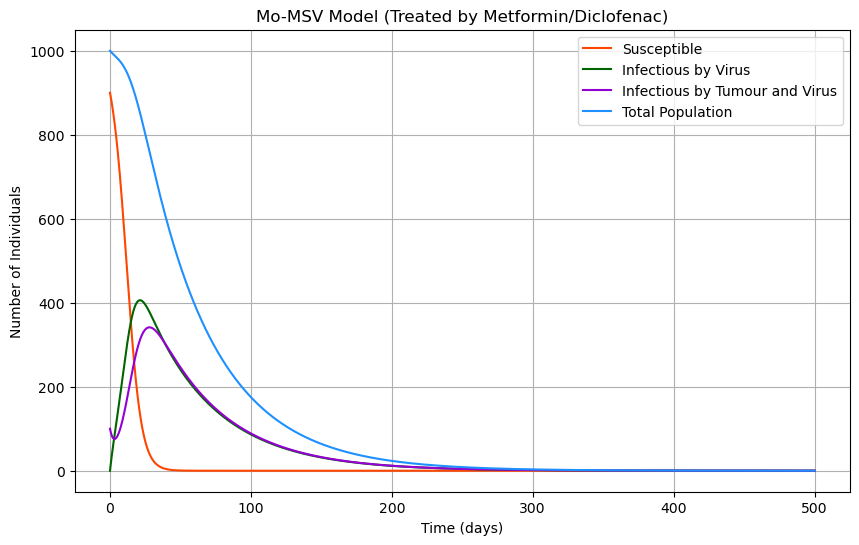

In [10]:
AZT = input("are we treating for the viral load? (yes or no) ").lower()
#phi = proportion of hamsters treated for viral load
if AZT == 'yes':
    phi = 1 
    virus = "no"
elif AZT == 'no':
    phi = 0
    virus = "yes"
else:
    print ("please restart the cell and answer yes or no")
    
metformin_diclofenac = input("are we treating for the tumour? (yes or no) ").lower()
#epsilon = proportion of hamsters treated for tumour
if metformin_diclofenac == 'yes':
    epsilon = 1
    tumour = "no"
elif metformin_diclofenac == 'no':
    epsilon = 0
    tumour = "yes"
else:
    print ("please restart the cell and answer yes or no")

# reset parameters
P = 1000  # initial population (usually you want the population to be fairly big)
E0 = 0 #inital number of exposed individuals
It0 = 100 * phi # initial number of individuals infectious by tumour alone
Iv0 = 0 # initial number of individuals infectious by virus alone
Ivt0 = 100 * (1-phi) # initial number of infectious by virus and tumour 
S0 = P - Iv0 - It0 - Ivt0 - E0 # initial number of susceptible individuals
D0 = 0 # initial number of deaths
#Note: at any time we should have N=S+I+E
K = 1000 #carrying capacity

t = np.linspace(0, 500, 100000)

# Initial conditions
y0_sid = P, S0, E0, It0, Iv0, Ivt0, D0 # Including the initial number of deaths in the initial conditions

# Integrate the SID equations over time t
ret_sid = odeint(sid_model, y0_sid, t, args=(P, beta, delta, mu, theta, alpha, kappa, phi, K, omega, epsilon))
N_sid, S_sid, E_sid, It_sid, Iv_sid, Ivt_sid, D_sid = ret_sid.T #Transpose the vector

# Plotting the SVEID model results
plt.figure(figsize=(10, 6))
plt.rcParams['font.size'] = 10
#plt.plot(t, N, 'g', label='Total Population')
plt.plot(t, S_sid, 'orangered', label='Susceptible')
if virus == "no":
    plt.plot(t, E_sid, 'lime', label='Exposed')
    plt.plot(t, It_sid, 'deeppink', label = 'Infectious by Tumour')
elif virus == "yes":
    plt.plot(t, Iv_sid, 'darkgreen', label = 'Infectious by Virus')
    plt.plot(t, Ivt_sid, 'darkviolet', label = 'Infectious by Tumour and Virus')
plt.plot(t, (N_sid), 'dodgerblue', label='Total Population')
#plt.plot(t/365, D_sid, 'k', label='Deceased') #- can uncomment this if you would like to see death!
if virus == "yes" and tumour == "yes":
    plt.title('Mo-MSV Model (Untreated)')
elif virus == "no" and tumour == "yes":
    plt.title('Mo-MSV Model (Treated by AZT)')
elif virus == "yes" and tumour == "no":
    plt.title('Mo-MSV Model (Treated by Metformin/Diclofenac)')
else:
    plt.title('Mo-MSV Model (Treated by Metformin/Diclofenac and AZT)')
plt.xlabel('Time (days)')
plt.ylabel('Number of Individuals')
plt.legend()
plt.grid(True)
plt.show()